# 필수과제 - 최종 데이터 분석 리포팅 과제

---

### 패키지 import

In [1]:
import pandas as pd
import numpy as np

### 데이터 불러오기

In [152]:
air_df = pd.read_csv('airplane.csv')

In [61]:
air_df

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
0,TRAIN_000000,4,15,NaN,NaN,0,0,OKC,13851,Oklahoma,HOU,12191,Texas,419.0,Southwest Airlines Co.,WN,19393.0,N7858A,NaN
1,TRAIN_000001,8,15,740.0,1024.0,0,0,ORD,13930,Illinois,SLC,14869,Utah,1250.0,SkyWest Airlines Inc.,UA,20304.0,N125SY,NaN
2,TRAIN_000002,9,6,1610.0,1805.0,0,0,CLT,11057,North Carolina,LGA,12953,New York,544.0,American Airlines Inc.,AA,19805.0,N103US,NaN
3,TRAIN_000003,7,10,905.0,1735.0,0,0,LAX,12892,California,EWR,11618,New Jersey,2454.0,United Air Lines Inc.,UA,NaN,N595UA,NaN
4,TRAIN_000004,1,11,900.0,1019.0,0,0,SFO,14771,California,ACV,10157,California,250.0,SkyWest Airlines Inc.,UA,20304.0,N161SY,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,TRAIN_999995,9,18,936.0,1243.0,0,0,ORD,13930,NaN,PHL,14100,NaN,678.0,United Air Lines Inc.,UA,19977.0,N477UA,NaN
999996,TRAIN_999996,5,30,920.0,1028.0,0,0,FAR,11637,NaN,MSP,13487,Minnesota,223.0,SkyWest Airlines Inc.,DL,NaN,N439SW,NaN
999997,TRAIN_999997,6,28,800.0,1340.0,0,0,OAK,13796,NaN,HOU,12191,Texas,1642.0,Southwest Airlines Co.,WN,19393.0,N230WN,NaN
999998,TRAIN_999998,9,27,1613.0,1824.0,0,0,BNA,10693,Tennessee,ATL,10397,NaN,214.0,Delta Air Lines Inc.,DL,19790.0,N968DL,NaN


## 1) EDA 
- 시각화 통한 인사이트 정리
- Delay에 따른 변수들의 시각화 필수

#### 1-1) 데이터의 열별 정보 확인
#### 1-2) 변수 간 상관관계 확인
#### 1-3) 변수별 분포 확인

---

### 1-1) 데이터의 열별 정보 확인

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# 경고 메시지 숨기기
import warnings
warnings.filterwarnings(action='ignore')

- ID: 샘플 고유 id
- (항공편 운항 관련 정보)
- Month: 해당 항공편의 출발 월
- Day_of_Month: Month에 해당하는 월의 날짜
- Estimated_Departure_Time: 전산 시스템을 바탕으로 측정된 비행기의 출발 시간 (HH:MM 형식)
- Estimated_Arrival_Time: 전산 시스템을 바탕으로 측정된 비행기의 도착 시간 (HH:MM 형식)
- Cancelled: 해당 항공편의 취소 여부 (0: 취소되지 않음, 1: 취소됨)
- Diverted: 해당 항공편의 경유 여부 (0: 취소되지 않음, 1: 취소됨)
- Origin_Airport: 해당 항공편 출발 공항의 고유 코드 (IATA 공항 코드)
- Origin_Airport_ID: 해당 항공편 출발 공항의 고유 ID (US DOT ID)
- Origin_State: 해당 항공편 출발 공항이 위치한 주의 이름
- Destination_Airport: 해당 항공편 도착 공항의 고유 코드 (IATA 공항 코드)
- Destination_Airport_ID: 해당 항공편 도착 공항의 고유 ID (US DOT ID)
- Destination_State: 해당 항공편 도착 공항이 위치한 주의 이름
- Distance: 출발 공항과 도착 공항 사이의 거리 (mile 단위)
- Airline: 해당 항공편을 운항하는 항공사
- Carrier_Code(IATA): 해당 항공편을 운항하는 항공사의 고유 코드 (IATA 공항 코드, 단 다른 항공사가 같은 코드를 보유할 수도 있음)
- Carrier_ID(DOT): 해당 항공편을 운항하는 항공사의 고유 ID (US DOT ID)
- Tail_Number: 해당 항공편을 운항하는 항공기의 고유 등록번호
- Delay: 항공편 지연 여부 (Not_Delayed, Delayed) (예측타깃)

In [62]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   ID                        1000000 non-null  object 
 1   Month                     1000000 non-null  int64  
 2   Day_of_Month              1000000 non-null  int64  
 3   Estimated_Departure_Time  890981 non-null   float64
 4   Estimated_Arrival_Time    890960 non-null   float64
 5   Cancelled                 1000000 non-null  int64  
 6   Diverted                  1000000 non-null  int64  
 7   Origin_Airport            1000000 non-null  object 
 8   Origin_Airport_ID         1000000 non-null  int64  
 9   Origin_State              890985 non-null   object 
 10  Destination_Airport       1000000 non-null  object 
 11  Destination_Airport_ID    1000000 non-null  int64  
 12  Destination_State         890921 non-null   object 
 13  Distance                  10

- Estimated_Departure_Time, Estimated_Arrival_Time, Origin_State, Destination_State, Airline, Carrier_Code(IATA), Carrier_ID(DOT), Delay 컬럼 결측치 존재

#### - ~타겟컬럼인 Delay컬럼의 결측치가 너무 많아서, 결측치를 제거한 행만을 사용~
#### - ~제거를 해도 약 25만개의 데이터가 있어 괜찮다고 생각하여 진행~
### 처음에 준지도학습을 해야 함을 인지하지 못함 → 여기서부터 다시 진행

In [8]:
# 실행X
# 결측치 제거
air_df = air.dropna(subset=['Delay'])

In [5]:
# 실행X
air_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255001 entries, 5 to 999992
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        255001 non-null  object 
 1   Month                     255001 non-null  int64  
 2   Day_of_Month              255001 non-null  int64  
 3   Estimated_Departure_Time  227160 non-null  float64
 4   Estimated_Arrival_Time    227317 non-null  float64
 5   Cancelled                 255001 non-null  int64  
 6   Diverted                  255001 non-null  int64  
 7   Origin_Airport            255001 non-null  object 
 8   Origin_Airport_ID         255001 non-null  int64  
 9   Origin_State              227145 non-null  object 
 10  Destination_Airport       255001 non-null  object 
 11  Destination_Airport_ID    255001 non-null  int64  
 12  Destination_State         227323 non-null  object 
 13  Distance                  255001 non-null  f

In [7]:
# 실행X
air_df.isnull().sum()

ID                              0
Month                           0
Day_of_Month                    0
Estimated_Departure_Time    27841
Estimated_Arrival_Time      27684
Cancelled                       0
Diverted                        0
Origin_Airport                  0
Origin_Airport_ID               0
Origin_State                27856
Destination_Airport             0
Destination_Airport_ID          0
Destination_State           27678
Distance                        0
Airline                     27540
Carrier_Code(IATA)          27888
Carrier_ID(DOT)             27770
Tail_Number                     0
Delay                           0
dtype: int64

- Estimated_Departure_Time, Estimated_Arrival_Time, Origin_State, Destination_State, Airline, Carrier_Code(IATA), Carrier_ID(DOT) 컬럼 결측치 존재

### 1-2) 변수 간 상관관계 확인 

<Axes: >

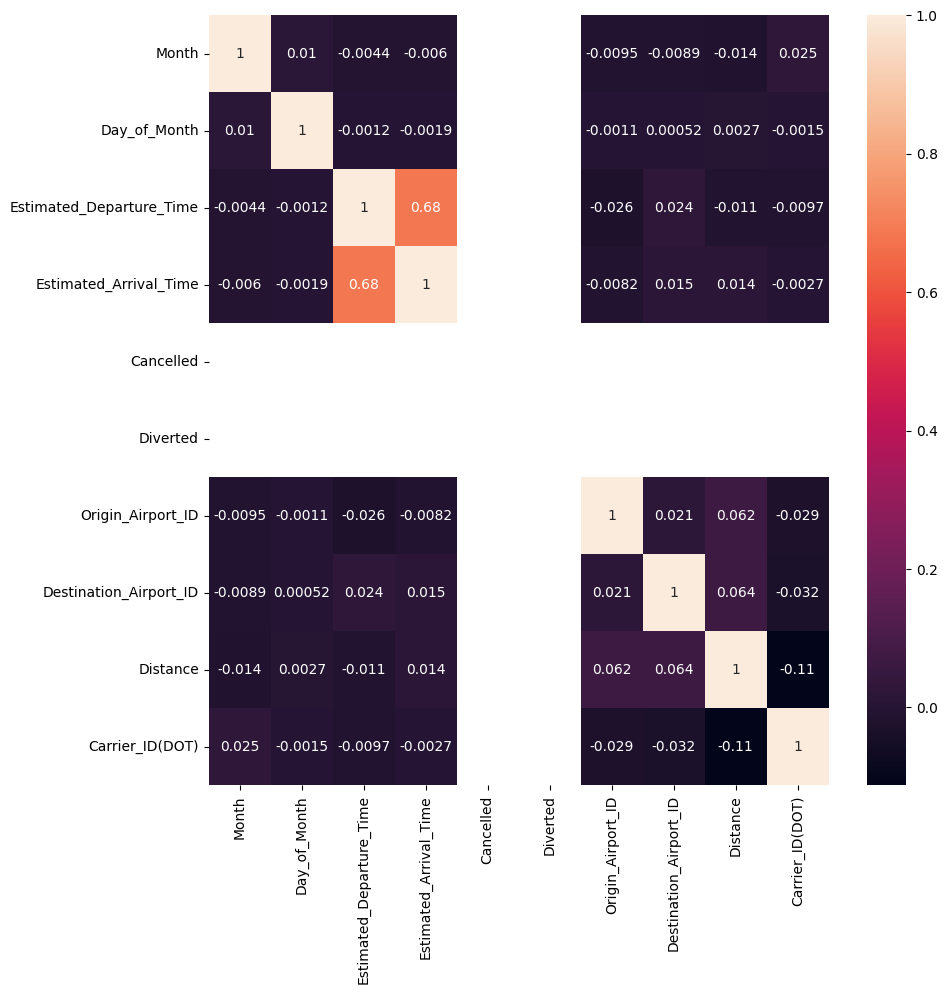

In [35]:
# 상관계수 시각화
plt.figure(figsize=(10, 10))
numeric_cols = air_df.select_dtypes(include=np.number).columns.tolist()
sns.heatmap(data=air_df[numeric_cols].corr(), annot=True)

In [63]:
air_df['Cancelled'].unique() # 값이 하나

array([0], dtype=int64)

In [64]:
air_df['Diverted'].unique() # 값이 하나

array([0], dtype=int64)

#### - `Estimated_Departure_Time`와 `Estimated_Arrival_Time` 간의 상관관계가 높다는 사실을 알 수 있다.

### 1-3) 변수별 분포 확인 

In [65]:
air_df.columns

Index(['ID', 'Month', 'Day_of_Month', 'Estimated_Departure_Time',
       'Estimated_Arrival_Time', 'Cancelled', 'Diverted', 'Origin_Airport',
       'Origin_Airport_ID', 'Origin_State', 'Destination_Airport',
       'Destination_Airport_ID', 'Destination_State', 'Distance', 'Airline',
       'Carrier_Code(IATA)', 'Carrier_ID(DOT)', 'Tail_Number', 'Delay'],
      dtype='object')

In [36]:
# 수치형 변수
numeric_cols

['Month',
 'Day_of_Month',
 'Estimated_Departure_Time',
 'Estimated_Arrival_Time',
 'Cancelled',
 'Diverted',
 'Origin_Airport_ID',
 'Destination_Airport_ID',
 'Distance',
 'Carrier_ID(DOT)']

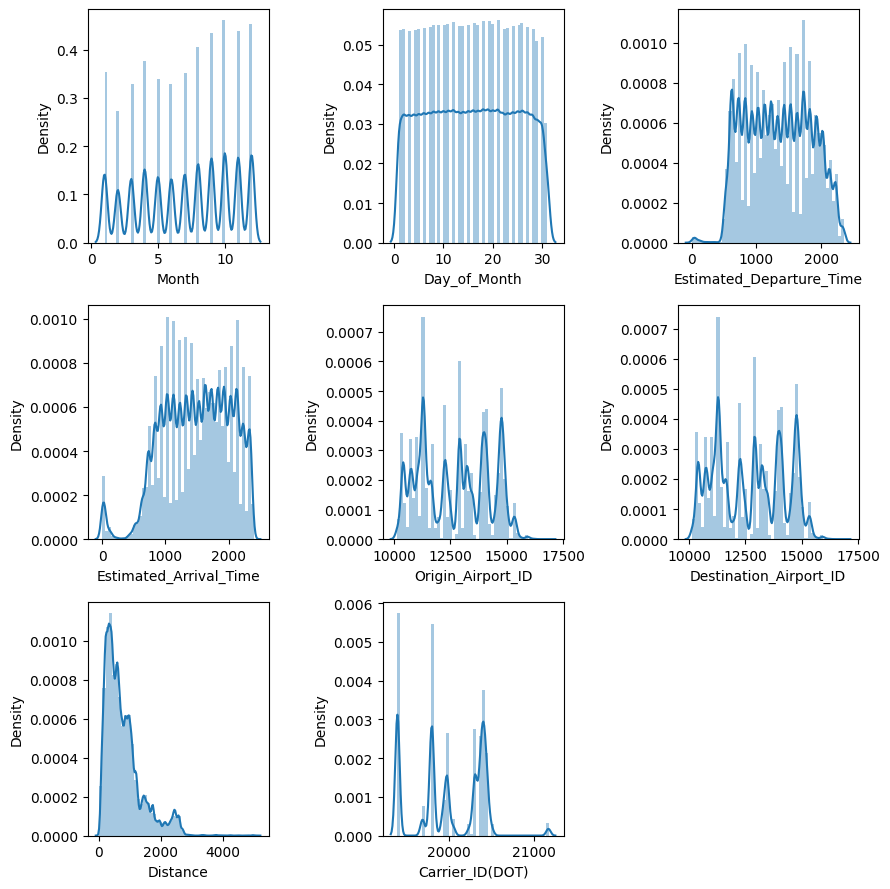

In [9]:
# 각 컬럼별 분포 확인
# 숫자형이 아닌 컬럼과 값이 하나인 Cancelled, Diverted 제외
air_num = air_df[['Month','Day_of_Month','Estimated_Departure_Time','Estimated_Arrival_Time','Origin_Airport_ID','Destination_Airport_ID','Distance','Carrier_ID(DOT)']]

plt.figure(figsize=(9, 9))
for i in range(8):
    plt.subplot(3, 3, i+1)
    sns.distplot(air_num.iloc[:, i])
plt.tight_layout()
plt.show()

### - Delay 컬럼 수치화

In [66]:
air_df['Delay'].unique()

array([nan, 'Not_Delayed', 'Delayed'], dtype=object)

In [67]:
air_df['Delay'] = air_df['Delay'].apply(lambda x: 0 if x=='Not_Delayed' else 1 if x=='Delayed' else x)

In [68]:
air_df

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
0,TRAIN_000000,4,15,NaN,NaN,0,0,OKC,13851,Oklahoma,HOU,12191,Texas,419.0,Southwest Airlines Co.,WN,19393.0,N7858A,NaN
1,TRAIN_000001,8,15,740.0,1024.0,0,0,ORD,13930,Illinois,SLC,14869,Utah,1250.0,SkyWest Airlines Inc.,UA,20304.0,N125SY,NaN
2,TRAIN_000002,9,6,1610.0,1805.0,0,0,CLT,11057,North Carolina,LGA,12953,New York,544.0,American Airlines Inc.,AA,19805.0,N103US,NaN
3,TRAIN_000003,7,10,905.0,1735.0,0,0,LAX,12892,California,EWR,11618,New Jersey,2454.0,United Air Lines Inc.,UA,NaN,N595UA,NaN
4,TRAIN_000004,1,11,900.0,1019.0,0,0,SFO,14771,California,ACV,10157,California,250.0,SkyWest Airlines Inc.,UA,20304.0,N161SY,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,TRAIN_999995,9,18,936.0,1243.0,0,0,ORD,13930,NaN,PHL,14100,NaN,678.0,United Air Lines Inc.,UA,19977.0,N477UA,NaN
999996,TRAIN_999996,5,30,920.0,1028.0,0,0,FAR,11637,NaN,MSP,13487,Minnesota,223.0,SkyWest Airlines Inc.,DL,NaN,N439SW,NaN
999997,TRAIN_999997,6,28,800.0,1340.0,0,0,OAK,13796,NaN,HOU,12191,Texas,1642.0,Southwest Airlines Co.,WN,19393.0,N230WN,NaN
999998,TRAIN_999998,9,27,1613.0,1824.0,0,0,BNA,10693,Tennessee,ATL,10397,NaN,214.0,Delta Air Lines Inc.,DL,19790.0,N968DL,NaN


In [69]:
air_df['Delay'].value_counts()
# 0: Not_Delayed
# 1: Delayed

Delay
0.0    210001
1.0     45000
Name: count, dtype: int64

In [70]:
air_df['Delay'].unique()

array([nan,  0.,  1.])

### - Delay를 포함한 변수 간 상관관계 재확인 

<Axes: >

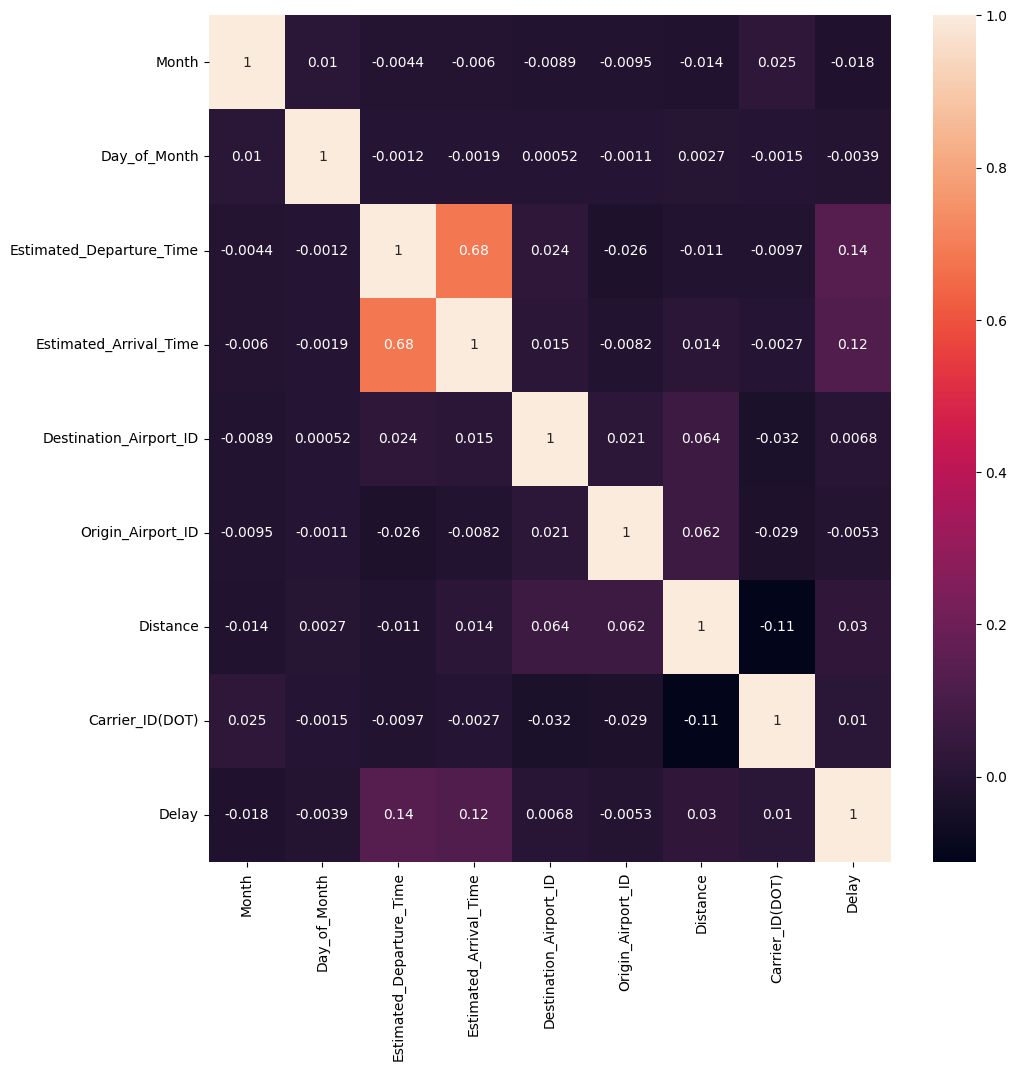

In [73]:
# 상관계수 시각화
plt.figure(figsize = (11, 11))
sns.heatmap(data = air_df[['Month','Day_of_Month','Estimated_Departure_Time','Estimated_Arrival_Time','Destination_Airport_ID','Origin_Airport_ID','Distance','Carrier_ID(DOT)','Delay']].corr(), annot=True)

- Delay 컬럼과 가장 큰 선형관계를 보이는 것은 Estimated_Departure_Time과 Estimated_Arrival_Time이다. 
- 하지만 이 마저도, 유의미한 선형관계를 갖는다고는 말할 수 없다.

## 2) 통계분석
- 유의미한 컬럼별로 정규성 검정
- 상관계수 등을 통한 변수 간의 관계 정리(위에서 완료)

#### 2-1) 범주형 변수 처리
#### 2-2) 사용하지 않을 변수 제거
#### 2-3) 결측치 처리
#### 2-4) 데이터 변환
#### 2-5) 스케일링

---

### 2-1) 범주형 변수 처리
- 유의미 해 보이는 것

#### 2-1-1) Origin_State
#### 2-1-2) Destination_State

- 라벨 인코딩은 이 데이터에 적합하지 않고(순서가 없어서),
- 원핫 인코딩은 변수의 수가 너무 많아지기 때문에 사용하지 않았다.

- 하여, 이진 인코딩(Binary Encoding)을 사용하였다.
- 이진 인코딩은 범주형 변수를 이진수로 변환하는 방법이다.
- 각 유니크한 값을 이진수로 표현하여 새로운 열(변수)을 생성한다. 
- 이 방법은 원핫 인코딩보다 변수의 개수가 적어 차원의 저주 문제를 해결할 수 있다.

### 2-1-1) Origin_State

In [74]:
# 이진 인코딩-1
from category_encoders import BinaryEncoder

encoder = BinaryEncoder(cols=['Origin_State'])
df_encoded = encoder.fit_transform(air_df)

In [75]:
air_df = df_encoded 
air_df

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State_0,...,Origin_State_5,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
0,TRAIN_000000,4,15,NaN,NaN,0,0,OKC,13851,0,...,1,HOU,12191,Texas,419.0,Southwest Airlines Co.,WN,19393.0,N7858A,NaN
1,TRAIN_000001,8,15,740.0,1024.0,0,0,ORD,13930,0,...,0,SLC,14869,Utah,1250.0,SkyWest Airlines Inc.,UA,20304.0,N125SY,NaN
2,TRAIN_000002,9,6,1610.0,1805.0,0,0,CLT,11057,0,...,1,LGA,12953,New York,544.0,American Airlines Inc.,AA,19805.0,N103US,NaN
3,TRAIN_000003,7,10,905.0,1735.0,0,0,LAX,12892,0,...,0,EWR,11618,New Jersey,2454.0,United Air Lines Inc.,UA,NaN,N595UA,NaN
4,TRAIN_000004,1,11,900.0,1019.0,0,0,SFO,14771,0,...,0,ACV,10157,California,250.0,SkyWest Airlines Inc.,UA,20304.0,N161SY,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,TRAIN_999995,9,18,936.0,1243.0,0,0,ORD,13930,0,...,1,PHL,14100,NaN,678.0,United Air Lines Inc.,UA,19977.0,N477UA,NaN
999996,TRAIN_999996,5,30,920.0,1028.0,0,0,FAR,11637,0,...,1,MSP,13487,Minnesota,223.0,SkyWest Airlines Inc.,DL,NaN,N439SW,NaN
999997,TRAIN_999997,6,28,800.0,1340.0,0,0,OAK,13796,0,...,1,HOU,12191,Texas,1642.0,Southwest Airlines Co.,WN,19393.0,N230WN,NaN
999998,TRAIN_999998,9,27,1613.0,1824.0,0,0,BNA,10693,0,...,0,ATL,10397,NaN,214.0,Delta Air Lines Inc.,DL,19790.0,N968DL,NaN


In [20]:
air_df.columns

Index(['ID', 'Month', 'Day_of_Month', 'Estimated_Departure_Time',
       'Estimated_Arrival_Time', 'Cancelled', 'Diverted', 'Origin_Airport',
       'Origin_Airport_ID', 'Origin_State_0', 'Origin_State_1',
       'Origin_State_2', 'Origin_State_3', 'Origin_State_4', 'Origin_State_5',
       'Destination_Airport', 'Destination_Airport_ID', 'Destination_State',
       'Distance', 'Airline', 'Carrier_Code(IATA)', 'Carrier_ID(DOT)',
       'Tail_Number', 'Delay'],
      dtype='object')

### 2-1-2) Destination_State

In [76]:
# 이진 인코딩-2

encoder = BinaryEncoder(cols=['Destination_State'])
air_df = encoder.fit_transform(air_df)

In [77]:
air_df

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State_0,...,Destination_State_2,Destination_State_3,Destination_State_4,Destination_State_5,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
0,TRAIN_000000,4,15,NaN,NaN,0,0,OKC,13851,0,...,0,0,0,1,419.0,Southwest Airlines Co.,WN,19393.0,N7858A,NaN
1,TRAIN_000001,8,15,740.0,1024.0,0,0,ORD,13930,0,...,0,0,1,0,1250.0,SkyWest Airlines Inc.,UA,20304.0,N125SY,NaN
2,TRAIN_000002,9,6,1610.0,1805.0,0,0,CLT,11057,0,...,0,0,1,1,544.0,American Airlines Inc.,AA,19805.0,N103US,NaN
3,TRAIN_000003,7,10,905.0,1735.0,0,0,LAX,12892,0,...,0,1,0,0,2454.0,United Air Lines Inc.,UA,NaN,N595UA,NaN
4,TRAIN_000004,1,11,900.0,1019.0,0,0,SFO,14771,0,...,0,1,0,1,250.0,SkyWest Airlines Inc.,UA,20304.0,N161SY,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,TRAIN_999995,9,18,936.0,1243.0,0,0,ORD,13930,0,...,1,1,1,1,678.0,United Air Lines Inc.,UA,19977.0,N477UA,NaN
999996,TRAIN_999996,5,30,920.0,1028.0,0,0,FAR,11637,0,...,1,0,0,1,223.0,SkyWest Airlines Inc.,DL,NaN,N439SW,NaN
999997,TRAIN_999997,6,28,800.0,1340.0,0,0,OAK,13796,0,...,0,0,0,1,1642.0,Southwest Airlines Co.,WN,19393.0,N230WN,NaN
999998,TRAIN_999998,9,27,1613.0,1824.0,0,0,BNA,10693,0,...,1,1,1,1,214.0,Delta Air Lines Inc.,DL,19790.0,N968DL,NaN


In [23]:
air_df.columns

Index(['ID', 'Month', 'Day_of_Month', 'Estimated_Departure_Time',
       'Estimated_Arrival_Time', 'Cancelled', 'Diverted', 'Origin_Airport',
       'Origin_Airport_ID', 'Origin_State_0', 'Origin_State_1',
       'Origin_State_2', 'Origin_State_3', 'Origin_State_4', 'Origin_State_5',
       'Destination_Airport', 'Destination_Airport_ID', 'Destination_State_0',
       'Destination_State_1', 'Destination_State_2', 'Destination_State_3',
       'Destination_State_4', 'Destination_State_5', 'Distance', 'Airline',
       'Carrier_Code(IATA)', 'Carrier_ID(DOT)', 'Tail_Number', 'Delay'],
      dtype='object')

In [78]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 29 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   ID                        1000000 non-null  object 
 1   Month                     1000000 non-null  int64  
 2   Day_of_Month              1000000 non-null  int64  
 3   Estimated_Departure_Time  890981 non-null   float64
 4   Estimated_Arrival_Time    890960 non-null   float64
 5   Cancelled                 1000000 non-null  int64  
 6   Diverted                  1000000 non-null  int64  
 7   Origin_Airport            1000000 non-null  object 
 8   Origin_Airport_ID         1000000 non-null  int64  
 9   Origin_State_0            1000000 non-null  int64  
 10  Origin_State_1            1000000 non-null  int64  
 11  Origin_State_2            1000000 non-null  int64  
 12  Origin_State_3            1000000 non-null  int64  
 13  Origin_State_4            10

### 2-2) 사용하지 않을 변수 제거

- `ID, Origin_Airport, Destination_Airport, Airline, Carrier_Code(IATA),Tail_Number` 컬럼은 크게 의미가 없거나, 다른 변수와 의미가 중복되어 중복 정보를 제공할 가능성이 있다고 판단하여 해당 컬럼을 제거하기로 결정하였다.

- `Cancelled, Diverted` 컬럼은 값이 0 하나로, 예측 모델에 도움을 주지 않을 것 같아 제거하기로 하였다.

In [79]:
air_df_fin = air_df.drop(['ID','Origin_Airport','Destination_Airport','Airline','Carrier_Code(IATA)','Tail_Number','Cancelled','Diverted'], axis=1)
air_df_fin

,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Origin_Airport_ID,Origin_State_0,Origin_State_1,Origin_State_2,Origin_State_3,Origin_State_4,...,Destination_Airport_ID,Destination_State_0,Destination_State_1,Destination_State_2,Destination_State_3,Destination_State_4,Destination_State_5,Distance,Carrier_ID(DOT),Delay
0,4,15,NaN,NaN,13851,0,0,0,0,0,...,12191,0,0,0,0,0,1,419.0,19393.0,NaN
1,8,15,740.0,1024.0,13930,0,0,0,0,1,...,14869,0,0,0,0,1,0,1250.0,20304.0,NaN
2,9,6,1610.0,1805.0,11057,0,0,0,0,1,...,12953,0,0,0,0,1,1,544.0,19805.0,NaN
3,7,10,905.0,1735.0,12892,0,0,0,1,0,...,11618,0,0,0,1,0,0,2454.0,NaN,NaN
4,1,11,900.0,1019.0,14771,0,0,0,1,0,...,10157,0,0,0,1,0,1,250.0,20304.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,9,18,936.0,1243.0,13930,0,0,0,1,0,...,14100,0,0,1,1,1,1,678.0,19977.0,NaN
999996,5,30,920.0,1028.0,11637,0,0,0,1,0,...,13487,0,1,1,0,0,1,223.0,NaN,NaN
999997,6,28,800.0,1340.0,13796,0,0,0,1,0,...,12191,0,0,0,0,0,1,1642.0,19393.0,NaN
999998,9,27,1613.0,1824.0,10693,0,1,1,0,0,...,10397,0,0,1,1,1,1,214.0,19790.0,NaN


In [80]:
air_df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Month                     1000000 non-null  int64  
 1   Day_of_Month              1000000 non-null  int64  
 2   Estimated_Departure_Time  890981 non-null   float64
 3   Estimated_Arrival_Time    890960 non-null   float64
 4   Origin_Airport_ID         1000000 non-null  int64  
 5   Origin_State_0            1000000 non-null  int64  
 6   Origin_State_1            1000000 non-null  int64  
 7   Origin_State_2            1000000 non-null  int64  
 8   Origin_State_3            1000000 non-null  int64  
 9   Origin_State_4            1000000 non-null  int64  
 10  Origin_State_5            1000000 non-null  int64  
 11  Destination_Airport_ID    1000000 non-null  int64  
 12  Destination_State_0       1000000 non-null  int64  
 13  Destination_State_1       10

### 2-3) 결측치 처리

In [81]:
air_df_fin.isnull().sum()

Month                            0
Day_of_Month                     0
Estimated_Departure_Time    109019
Estimated_Arrival_Time      109040
Origin_Airport_ID                0
Origin_State_0                   0
Origin_State_1                   0
Origin_State_2                   0
Origin_State_3                   0
Origin_State_4                   0
Origin_State_5                   0
Destination_Airport_ID           0
Destination_State_0              0
Destination_State_1              0
Destination_State_2              0
Destination_State_3              0
Destination_State_4              0
Destination_State_5              0
Distance                         0
Carrier_ID(DOT)             108997
Delay                       744999
dtype: int64

- `Estimated_Departure_Time, Estimated_Arrival_Time, Carrier_ID(DOT)` 컬럼 결측치 존재

#### 2-3-1) Estimated_Departure_Time 결측치 채우기
#### 2-3-2) Estimated_Arrival_Time 결측치 채우기
#### 2-3-3) Carrier_ID(DOT) 결측치 채우기

### 2-3-1) Estimated_Departure_Time 결측치 채우기

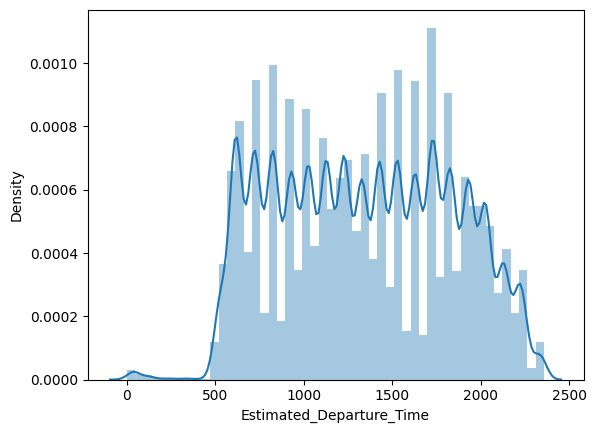

In [82]:
sns.distplot(air_df_fin['Estimated_Departure_Time'])
plt.show()

#### - Hot deck imputation(핫 덱 결측치 대체)
- Estimated_Departure_Time 변수에서 결측치가 있는 경우, Destination_Airport_ID 변수에서 랜덤으로 추출한 값으로 대체
- Estimated_Departure_Time 컬럼과 가장 상관관계가 나은 Destination_Airport_ID 컬럼 사용.

In [83]:
# 결측치 처리
for DAI in air_df_fin["Destination_Airport_ID"].unique():
    EDT_mean = air_df_fin.loc[air_df_fin["Destination_Airport_ID"] == DAI, "Estimated_Departure_Time"].mean()
    EDT_std = air_df_fin.loc[air_df_fin["Destination_Airport_ID"] == DAI, "Estimated_Departure_Time"].std()
    EDT_null_count = air_df_fin.loc[(air_df_fin["Destination_Airport_ID"] == DAI) & (air_df_fin["Estimated_Departure_Time"].isna()), "Estimated_Departure_Time"].shape[0]
    
    EDT_mean = int(EDT_mean)
    if np.isnan(EDT_std):
        EDT_std = 0
    else:
        EDT_std = int(EDT_std)
    
    if EDT_std == 0:
        EDT_null_random_list = np.full((EDT_null_count,), EDT_mean)
    else:
        EDT_null_random_list = np.random.randint(int(EDT_mean - EDT_std), int(EDT_mean + EDT_std), size=EDT_null_count)
    
    air_df_fin.loc[(air_df_fin["Destination_Airport_ID"] == DAI) & (air_df_fin["Estimated_Departure_Time"].isna()), "Estimated_Departure_Time"] = EDT_null_random_list


### 2-3-2) Estimated_Arrival_Time 결측치 채우기

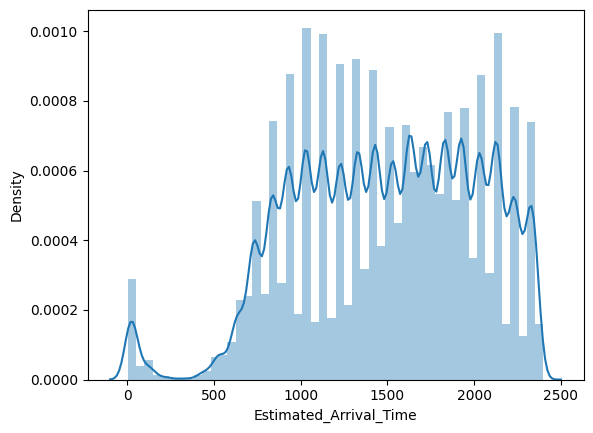

In [84]:
sns.distplot(air_df_fin['Estimated_Arrival_Time'])
plt.show()

#### - Hot deck imputation(핫 덱 결측치 대체)
- Estimated_Arrival_Time 변수에서 결측치가 있는 경우, Destination_Airport_ID 변수에서 랜덤으로 추출한 값으로 대체
- Estimated_Arrival_Time 컬럼과 가장 상관관계가 나은 Destination_Airport_ID 컬럼 사용.

In [85]:
# 결측치 처리
for DAI in air_df_fin["Destination_Airport_ID"].unique():
    EDT_mean = air_df_fin.loc[air_df_fin["Destination_Airport_ID"] == DAI, "Estimated_Arrival_Time"].mean()
    EDT_std = air_df_fin.loc[air_df_fin["Destination_Airport_ID"] == DAI, "Estimated_Arrival_Time"].std()
    EDT_null_count = air_df_fin.loc[(air_df_fin["Destination_Airport_ID"] == DAI) & (air_df_fin["Estimated_Arrival_Time"].isna()), "Estimated_Arrival_Time"].shape[0]
    
    EDT_mean = int(EDT_mean)
    if np.isnan(EDT_std):
        EDT_std = 0
    else:
        EDT_std = int(EDT_std)
    
    if EDT_std == 0:
        EDT_null_random_list = np.full((EDT_null_count,), EDT_mean)
    else:
        EDT_null_random_list = np.random.randint(int(EDT_mean - EDT_std), int(EDT_mean + EDT_std), size=EDT_null_count)
    
    air_df_fin.loc[(air_df_fin["Destination_Airport_ID"] == DAI) & (air_df_fin["Estimated_Arrival_Time"].isna()), "Estimated_Arrival_Time"] = EDT_null_random_list


### 2-3-3) Carrier_ID(DOT) 결측치

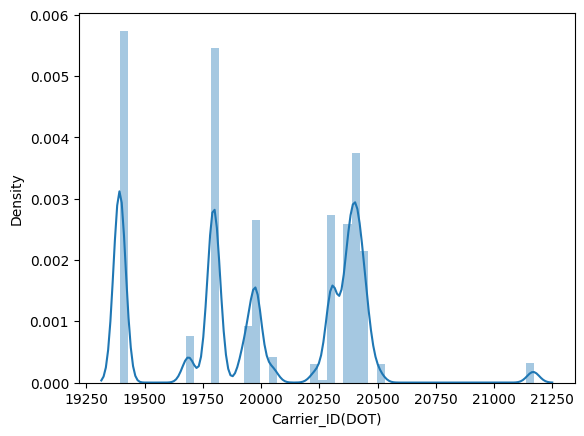

In [86]:
sns.distplot(air_df_fin['Carrier_ID(DOT)'])
plt.show()

- 해당 항공편을 운항하는 항공사의 고유 ID는 **최빈값**으로 결측치 대체

In [87]:
air_df_fin['Carrier_ID(DOT)'].mode()

0    19393.0
Name: Carrier_ID(DOT), dtype: float64

In [88]:
# 결측치 처리
air_df_fin['Carrier_ID(DOT)'] = air_df_fin['Carrier_ID(DOT)'].fillna(value=19393.0)

In [89]:
# 대체된 결측치 확인
print(air_df_fin.isna().sum())

Month                            0
Day_of_Month                     0
Estimated_Departure_Time         0
Estimated_Arrival_Time           0
Origin_Airport_ID                0
Origin_State_0                   0
Origin_State_1                   0
Origin_State_2                   0
Origin_State_3                   0
Origin_State_4                   0
Origin_State_5                   0
Destination_Airport_ID           0
Destination_State_0              0
Destination_State_1              0
Destination_State_2              0
Destination_State_3              0
Destination_State_4              0
Destination_State_5              0
Distance                         0
Carrier_ID(DOT)                  0
Delay                       744999
dtype: int64


In [90]:
air_df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Month                     1000000 non-null  int64  
 1   Day_of_Month              1000000 non-null  int64  
 2   Estimated_Departure_Time  1000000 non-null  float64
 3   Estimated_Arrival_Time    1000000 non-null  float64
 4   Origin_Airport_ID         1000000 non-null  int64  
 5   Origin_State_0            1000000 non-null  int64  
 6   Origin_State_1            1000000 non-null  int64  
 7   Origin_State_2            1000000 non-null  int64  
 8   Origin_State_3            1000000 non-null  int64  
 9   Origin_State_4            1000000 non-null  int64  
 10  Origin_State_5            1000000 non-null  int64  
 11  Destination_Airport_ID    1000000 non-null  int64  
 12  Destination_State_0       1000000 non-null  int64  
 13  Destination_State_1       10

- 모든 결측치 처리 완료

### 2-4) 데이터 변환

- `Distance` 변수의 분포가 왼쪽으로 치우쳐져 있어서, 로그 변환의 필요성을 느꼈다.

- 다른 변수들은 데이터 변환의 필요성을 크게 느끼지 못했다.

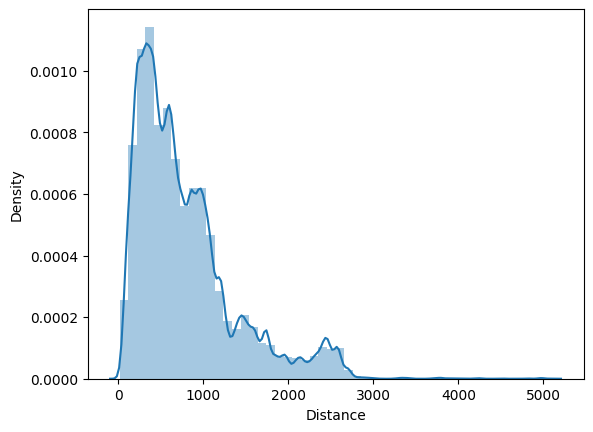

In [91]:
sns.distplot(air_df_fin['Distance'])
plt.show()

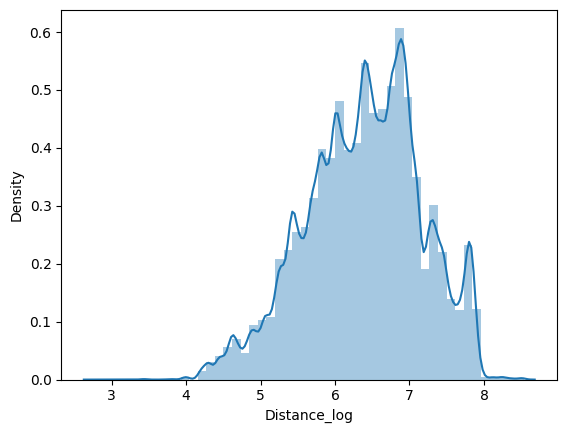

In [92]:
# Distance 컬럼에 로그 변환 적용
air_df_fin['Distance_log'] = np.log(air_df_fin['Distance'])
sns.distplot(air_df_fin['Distance_log'])
plt.show()

In [93]:
df = air_df_fin.drop('Distance', axis=1)
df

,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Origin_Airport_ID,Origin_State_0,Origin_State_1,Origin_State_2,Origin_State_3,Origin_State_4,...,Destination_Airport_ID,Destination_State_0,Destination_State_1,Destination_State_2,Destination_State_3,Destination_State_4,Destination_State_5,Carrier_ID(DOT),Delay,Distance_log
0,4,15,1754.0,1915.0,13851,0,0,0,0,0,...,12191,0,0,0,0,0,1,19393.0,NaN,6.037871
1,8,15,740.0,1024.0,13930,0,0,0,0,1,...,14869,0,0,0,0,1,0,20304.0,NaN,7.130899
2,9,6,1610.0,1805.0,11057,0,0,0,0,1,...,12953,0,0,0,0,1,1,19805.0,NaN,6.298949
3,7,10,905.0,1735.0,12892,0,0,0,1,0,...,11618,0,0,0,1,0,0,19393.0,NaN,7.805475
4,1,11,900.0,1019.0,14771,0,0,0,1,0,...,10157,0,0,0,1,0,1,20304.0,NaN,5.521461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,9,18,936.0,1243.0,13930,0,0,0,1,0,...,14100,0,0,1,1,1,1,19977.0,NaN,6.519147
999996,5,30,920.0,1028.0,11637,0,0,0,1,0,...,13487,0,1,1,0,0,1,19393.0,NaN,5.407172
999997,6,28,800.0,1340.0,13796,0,0,0,1,0,...,12191,0,0,0,0,0,1,19393.0,NaN,7.403670
999998,9,27,1613.0,1824.0,10693,0,1,1,0,0,...,10397,0,0,1,1,1,1,19790.0,NaN,5.365976


### 2-5) 스케일링

In [101]:
df.columns

Index(['Month', 'Day_of_Month', 'Estimated_Departure_Time',
       'Estimated_Arrival_Time', 'Origin_Airport_ID', 'Origin_State_0',
       'Origin_State_1', 'Origin_State_2', 'Origin_State_3', 'Origin_State_4',
       'Origin_State_5', 'Destination_Airport_ID', 'Destination_State_0',
       'Destination_State_1', 'Destination_State_2', 'Destination_State_3',
       'Destination_State_4', 'Destination_State_5', 'Carrier_ID(DOT)',
       'Delay', 'Distance_log'],
      dtype='object')

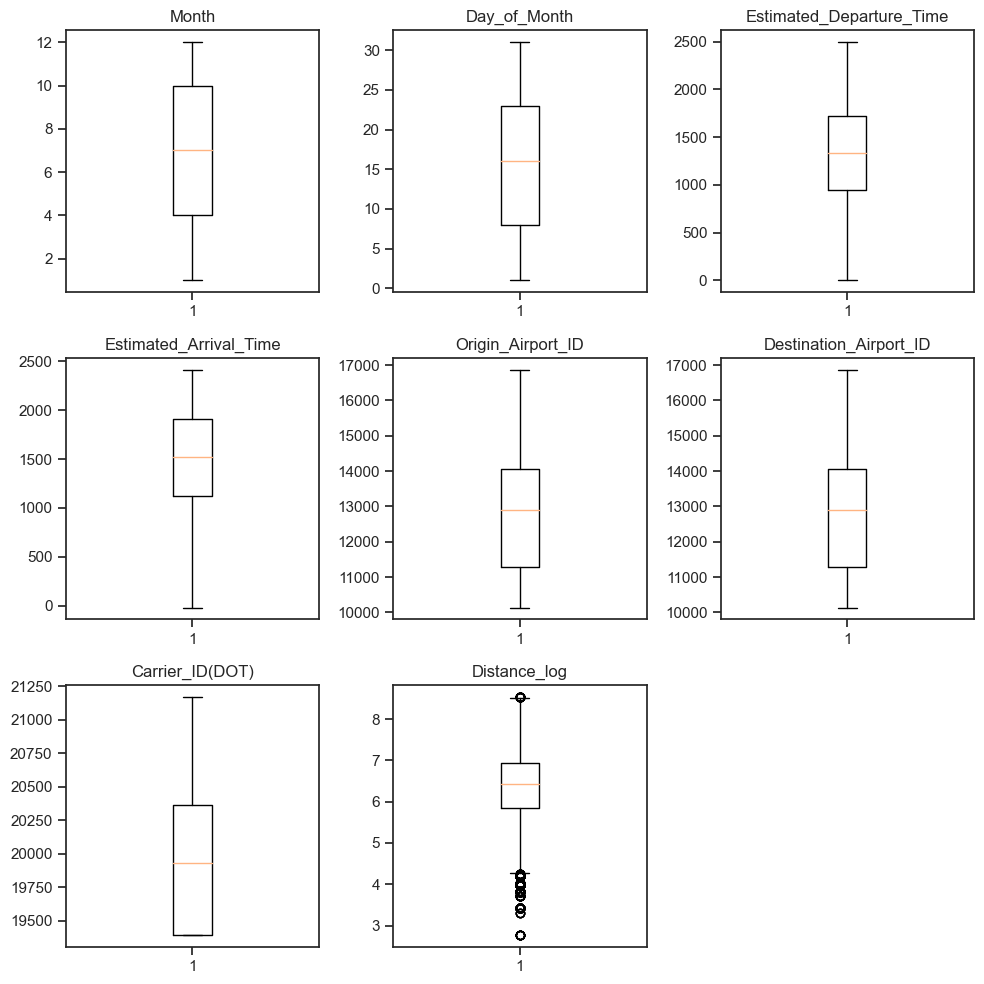

In [105]:
# 이상치가 있는지 박스플롯 통해 확인

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

cols = ['Month', 'Day_of_Month','Estimated_Departure_Time',
       'Estimated_Arrival_Time', 'Origin_Airport_ID', 'Destination_Airport_ID','Carrier_ID(DOT)','Distance_log']
for i, ax in enumerate(axes.flatten()):
    if i < len(cols):
        ax.boxplot(df[cols[i]])
        ax.set_title(cols[i])
    else:
        ax.set_visible(False)
        
plt.tight_layout()
plt.show()

#### - `Distance_log` 컬럼에 이상치가 있는 것 같아, 이상치에 덜 민감한 `RobustScaler()`를 사용하고자 한다.

In [4]:
from sklearn.preprocessing import RobustScaler

# Delay 컬럼을 제외한 나머지 컬럼 추출
cols_to_scale = [col for col in df.columns if col != 'Delay']

# RobustScaler 객체 생성
scaler = RobustScaler()

# Delay 컬럼을 제외한 나머지 컬럼에 대해 RobustScaler 적용
scaled_data = scaler.fit_transform(df[cols_to_scale])

# 스케일링된 데이터를 데이터프레임으로 변환
scaled_df = pd.DataFrame(data=scaled_data, columns=cols_to_scale)

# Delay 컬럼을 원래의 데이터프레임에서 추출하여 스케일링된 데이터프레임에 추가
scaled_df['Delay'] = df['Delay']


In [5]:
scaled_df

,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Origin_Airport_ID,Origin_State_0,Origin_State_1,Origin_State_2,Origin_State_3,Origin_State_4,...,Destination_Airport_ID,Destination_State_0,Destination_State_1,Destination_State_2,Destination_State_3,Destination_State_4,Destination_State_5,Carrier_ID(DOT),Distance_log,Delay
0,-0.500000,-0.066667,0.537179,0.501906,0.347920,0.0,0.0,0.0,-1.0,0.0,...,-0.252441,0.0,0.0,-1.0,-1.0,0.0,0.0,-0.551901,-0.370855,NaN
1,0.166667,-0.066667,-0.762821,-0.630241,0.376492,0.0,0.0,0.0,-1.0,1.0,...,0.716094,0.0,0.0,-1.0,-1.0,1.0,-1.0,0.384378,0.651025,NaN
2,0.333333,-0.666667,0.352564,0.362135,-0.662568,0.0,0.0,0.0,-1.0,1.0,...,0.023146,0.0,0.0,-1.0,-1.0,1.0,0.0,-0.128469,-0.126771,NaN
3,0.000000,-0.400000,-0.551282,0.273189,0.001085,0.0,0.0,0.0,0.0,0.0,...,-0.459675,0.0,0.0,-1.0,0.0,0.0,-1.0,-0.551901,1.281691,NaN
4,-1.000000,-0.333333,-0.557692,-0.636595,0.680651,0.0,0.0,0.0,0.0,0.0,...,-0.988065,0.0,0.0,-1.0,0.0,0.0,0.0,0.384378,-0.853650,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.333333,0.133333,-0.511538,-0.351970,0.376492,0.0,0.0,0.0,0.0,0.0,...,0.437975,0.0,0.0,0.0,0.0,1.0,0.0,0.048304,0.079094,NaN
999996,-0.333333,0.933333,-0.532051,-0.625159,-0.452803,0.0,0.0,0.0,0.0,0.0,...,0.216275,0.0,1.0,0.0,-1.0,0.0,0.0,-0.551901,-0.960500,NaN
999997,-0.166667,0.800000,-0.685897,-0.228717,0.328029,0.0,0.0,0.0,0.0,0.0,...,-0.252441,0.0,0.0,-1.0,-1.0,0.0,0.0,-0.551901,0.906041,NaN
999998,0.333333,0.733333,0.356410,0.386277,-0.794213,0.0,1.0,1.0,-1.0,0.0,...,-0.901266,0.0,0.0,0.0,0.0,1.0,0.0,-0.143885,-0.999014,NaN


In [6]:
df = scaled_df

#### - 스케일링 완료

## 3) 분석 모델링
- Delay를 예측하는 분류 모델링
- 정확도, f1스코어, precision, recall 사용하여 최적의 모델링 선정
- 하이퍼파라미터 사용


#### 3-1) 교차검증 통한 모델 선택
#### 3-2) 하이퍼파라미터 튜닝
#### 3-3) 모델 학습
#### 3-4) Delay 컬럼 결측치 예측

---

In [9]:
df.info(), df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Month                     1000000 non-null  float64
 1   Day_of_Month              1000000 non-null  float64
 2   Estimated_Departure_Time  1000000 non-null  float64
 3   Estimated_Arrival_Time    1000000 non-null  float64
 4   Origin_Airport_ID         1000000 non-null  float64
 5   Origin_State_0            1000000 non-null  float64
 6   Origin_State_1            1000000 non-null  float64
 7   Origin_State_2            1000000 non-null  float64
 8   Origin_State_3            1000000 non-null  float64
 9   Origin_State_4            1000000 non-null  float64
 10  Origin_State_5            1000000 non-null  float64
 11  Destination_Airport_ID    1000000 non-null  float64
 12  Destination_State_0       1000000 non-null  float64
 13  Destination_State_1       10

(None,
 Month                            0
 Day_of_Month                     0
 Estimated_Departure_Time         0
 Estimated_Arrival_Time           0
 Origin_Airport_ID                0
 Origin_State_0                   0
 Origin_State_1                   0
 Origin_State_2                   0
 Origin_State_3                   0
 Origin_State_4                   0
 Origin_State_5                   0
 Destination_Airport_ID           0
 Destination_State_0              0
 Destination_State_1              0
 Destination_State_2              0
 Destination_State_3              0
 Destination_State_4              0
 Destination_State_5              0
 Carrier_ID(DOT)                  0
 Distance_log                     0
 Delay                       744999
 dtype: int64)

- 예측해야 하는 Delay 컬럼 수 : 744999
- 결측치가 없는 Delay 컬럼 수 : 255001

In [3]:
# Null 값이 아닌 컬럼들로 모델 학습
df_Notnull = df[df.Delay.notnull()]

In [4]:
# 예측해야 하는 Delay 컬럼들
df_Null = df[df.Delay.isnull()]

**모델 종류**
- 의사결정나무
- 로지스틱회귀
- 랜덤포레스트
- 그라디언트부스팅
- LightGBM
- XGBoost

### 3-1) 교차검증 통한 모델 선택

In [5]:
# 데이터프레임에서 독립변수와 종속변수 선택
X = df_Notnull[['Month', 'Day_of_Month', 'Estimated_Departure_Time',
       'Estimated_Arrival_Time', 'Origin_Airport_ID', 'Origin_State_0',
       'Origin_State_1', 'Origin_State_2', 'Origin_State_3', 'Origin_State_4',
       'Origin_State_5', 'Destination_Airport_ID', 'Destination_State_0',
       'Destination_State_1', 'Destination_State_2', 'Destination_State_3',
       'Destination_State_4', 'Destination_State_5', 'Carrier_ID(DOT)',
       'Distance_log']].reset_index(drop=True)

y = df_Notnull['Delay'].reset_index(drop=True)

In [7]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

### 3-1-1) 의사결정나무

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# 모델 생성
tree = DecisionTreeClassifier()

# cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=25)

f1_scores = cross_val_score(tree, X, y, cv=cv, scoring='f1_macro')
accuracy_scores = cross_val_score(tree, X, y, cv=cv, scoring='accuracy')

# 스코어 계산
print("Decision Tree F1 score: " + str(round(np.mean(f1_scores), 4)))
print("Decision Tree accuracy score: " + str(round(np.mean(accuracy_scores), 4)))


Decision Tree F1 score: 0.5258
Decision Tree accuracy score: 0.7109


### 3-1-2) 로지스틱회귀

In [8]:
from sklearn.linear_model import LogisticRegression

# 모델 생성
logreg = LogisticRegression()

# cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=25)

f1_scores = cross_val_score(logreg, X, y, cv=cv, scoring='f1_macro')
accuracy_scores = cross_val_score(logreg, X, y, cv=cv, scoring='accuracy')

# 스코어 계산
print("Logistic Regression F1 score: " + str(round(np.mean(f1_scores), 4)))
print("Logistic Regression accuracy: " + str(round(np.mean(accuracy_scores), 4)))

Logistic Regression F1 score: 0.4516
Logistic Regression accuracy: 0.8235


### 3-1-3) 랜덤포레스트

In [11]:
from sklearn.ensemble import RandomForestClassifier

# 모델 생성
rf = RandomForestClassifier()

# cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=25)

f1_scores = cross_val_score(rf, X, y, cv=cv, scoring='f1_macro')
accuracy_scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')

# 스코어 계산
print("Random Forest F1 score: " + str(round(np.mean(f1_scores), 4)))
print("Random Forest accuracy: " + str(round(np.mean(accuracy_scores), 4)))


Random Forest F1 score: 0.4792
Random Forest accuracy: 0.8175


### 3-1-4) 그라디언트부스팅

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

# 모델 생성
gb = GradientBoostingClassifier()

# cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=25)

f1_scores = cross_val_score(gb, X, y, cv=cv, scoring='f1_macro')
accuracy_scores = cross_val_score(gb, X, y, cv=cv, scoring='accuracy')

# 스코어 계산
print("Gradient Boosting F1 score: " + str(round(np.mean(f1_scores), 4)))
print("Gradient Boosting accuracy: " + str(round(np.mean(accuracy_scores), 4)))


Gradient Boosting F1 score: 0.4516
Gradient Boosting accuracy: 0.8235


### 3-1-5) LightGBM

In [14]:
from lightgbm import LGBMClassifier

# 모델 생성
lgbm = LGBMClassifier()

# cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=25)

f1_scores = cross_val_score(lgbm, X, y, cv=cv, scoring='f1_macro')
accuracy_scores = cross_val_score(lgbm, X, y, cv=cv, scoring='accuracy')

# 스코어 계산
print("LightGBM F1 score: " + str(round(np.mean(f1_scores), 4)))
print("LightGBM accuracy: " + str(round(np.mean(accuracy_scores), 4)))


LightGBM F1 score: 0.4572
LightGBM accuracy: 0.8239


### 3-1-6) XGBoost

In [20]:
import xgboost as xgb

# 모델 생성
xgb = xgb.XGBClassifier()

# cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=25)

f1_scores = cross_val_score(xgb, X, y, cv=cv, scoring='f1_macro')
accuracy_scores = cross_val_score(xgb, X, y, cv=cv, scoring='accuracy')

# 스코어 계산
print("XGBoost F1 score: " + str(round(np.mean(f1_scores), 4)))
print("XGBoost accuracy: " + str(round(np.mean(accuracy_scores), 4)))


XGBoost F1 score: 0.4713
XGBoost accuracy: 0.8233


---

#### 데이터의 불균형 확인

In [17]:
df_Notnull['Delay'].value_counts()

Delay
0.0    210001
1.0     45000
Name: count, dtype: int64

#### - `데이터의 클래스`가 `불균형`하여 모델의 정확도보다는 `f1 score`로 모델을 판단하는 것이 좋겠다고 판단
#### - 하지만 `데이터의 특성`이 `복잡`하여 앙상블 모델 중 하나인, 정확도가 제일 높은 `LightGBM`도 좋다고도 생각
#### - 하여, 두 가지 모델을 파라미터 튜닝 해보며 다시 비교해보겠다.

### 최종모델 두 가지 : 의사결정나무, LightGBM

---

### 3-2) 하이퍼파라미터 튜닝

### 3-2-1) 의사결정나무

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# 의사결정나무 모델 생성
dt = DecisionTreeClassifier()

# 하이퍼파라미터 후보값 정의
params = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# 그리드 서치 객체 생성
grid_dt = GridSearchCV(estimator=dt, param_grid=params, cv=5, scoring='f1_macro')

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# 그리드 서치 수행
grid_dt.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best parameters: ", grid_dt.best_params_)

# 최적 모델 성능 평가
print("Best F1-score: {:.4f}".format(grid_dt.best_score_))


Best parameters:  {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best F1-score: 0.4522


### 3-2-2) LightGBM

In [23]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# LightGBM 모델 생성
lgbm = lgb.LGBMClassifier()

# 하이퍼파라미터 후보값 정의
params = {
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 63, 127],
    'learning_rate': [0.1, 0.05, 0.01]
}

# 그리드 서치 객체 생성
grid_lgbm = GridSearchCV(estimator=lgbm, param_grid=params, cv=5, scoring='f1_macro')

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# 그리드 서치 수행
grid_lgbm.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best parameters: ", grid_lgbm.best_params_)

# 최적 모델 성능 평가
print("Best F1-score: {:.4f}".format(grid_lgbm.best_score_))


Best parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'num_leaves': 127}
Best F1-score: 0.4622


### ✔️F1 score = 0.4622로 LightGBM이 더 높으므로 최종모델 : `LightGBM`

### 3-3) 모델 학습 및 Delay 컬럼 결측치 예측

In [95]:
# 학습 데이터 생성
X_train = df_Notnull[['Month', 'Day_of_Month', 'Estimated_Departure_Time',
       'Estimated_Arrival_Time', 'Origin_Airport_ID', 'Origin_State_0',
       'Origin_State_1', 'Origin_State_2', 'Origin_State_3', 'Origin_State_4',
       'Origin_State_5', 'Destination_Airport_ID', 'Destination_State_0',
       'Destination_State_1', 'Destination_State_2', 'Destination_State_3',
       'Destination_State_4', 'Destination_State_5', 'Carrier_ID(DOT)',
       'Distance_log']].reset_index(drop=True)
y_train = df_Notnull['Delay'].reset_index(drop=True)

In [109]:
# LightGBM 모델 생성
lgbm = lgb.LGBMClassifier(learning_rate=0.1, max_depth=7, num_leaves=127)

# 결측치 없는 데이터프레임으로 학습
lgbm.fit(X_train, y_train)

LGBMClassifier(max_depth=7, num_leaves=127)

In [99]:
# 타겟변수 결측치 있는 데이터프레임에서 독립변수 선택
X_test = df_Null[['Month', 'Day_of_Month', 'Estimated_Departure_Time',
       'Estimated_Arrival_Time', 'Origin_Airport_ID', 'Origin_State_0',
       'Origin_State_1', 'Origin_State_2', 'Origin_State_3', 'Origin_State_4',
       'Origin_State_5', 'Destination_Airport_ID', 'Destination_State_0',
       'Destination_State_1', 'Destination_State_2', 'Destination_State_3',
       'Destination_State_4', 'Destination_State_5', 'Carrier_ID(DOT)',
       'Distance_log']].reset_index(drop=True)

In [110]:
# 예측해야 하는 수
len(X_test)

744999

#### - 예측해야하는 값이 너무 많아서 20만개씩 예측

In [114]:
# 1 ~ 200,000
X_null_1 = X_test[:200000]

In [115]:
# 200,000 ~ 400,000
X_null_2 = X_null[200000:400000]

In [116]:
# 400,000 ~ 600,000
X_null_3 = X_null[400000:600000]

In [117]:
# 600,000 ~ 744,999
X_null_4 = X_null[600000:745000]

In [120]:
# 결측치 있는 데이터프레임으로 예측
y_pred1 = lgbm.predict(X_null_1)
y_pred2 = lgbm.predict(X_null_2)
y_pred3 = lgbm.predict(X_null_3)
y_pred4 = lgbm.predict(X_null_4)

In [122]:
# 데이터프레임으로 변환
y_test1 = pd.DataFrame(y_pred1)
y_test2 = pd.DataFrame(y_pred2)
y_test3 = pd.DataFrame(y_pred3)
y_test4 = pd.DataFrame(y_pred4)

In [165]:
# 하나의 데이터프레임으로 결합
y_test = pd.concat([y_test1,y_test2,y_test3,y_test4])

In [169]:
# 데이터프레임 -> 리스트로 변환
y_test = y_test[0].tolist()

In [172]:
# 처음에 주어진 데이터프레임에 예측 데이터 넣기
air_df_Null = air_df[air_df.Delay.isnull()].reset_index(drop=True)
air_df_notNull = air_df[air_df.Delay.notnull()].reset_index(drop=True)

air_df_Null['Delay'] = y_test

In [182]:
air_df_Null

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
0,TRAIN_000000,4,15,NaN,NaN,0,0,OKC,13851,Oklahoma,HOU,12191,Texas,419.0,Southwest Airlines Co.,WN,19393.0,N7858A,0.0
1,TRAIN_000001,8,15,740.0,1024.0,0,0,ORD,13930,Illinois,SLC,14869,Utah,1250.0,SkyWest Airlines Inc.,UA,20304.0,N125SY,0.0
2,TRAIN_000002,9,6,1610.0,1805.0,0,0,CLT,11057,North Carolina,LGA,12953,New York,544.0,American Airlines Inc.,AA,19805.0,N103US,0.0
3,TRAIN_000003,7,10,905.0,1735.0,0,0,LAX,12892,California,EWR,11618,New Jersey,2454.0,United Air Lines Inc.,UA,NaN,N595UA,0.0
4,TRAIN_000004,1,11,900.0,1019.0,0,0,SFO,14771,California,ACV,10157,California,250.0,SkyWest Airlines Inc.,UA,20304.0,N161SY,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744994,TRAIN_999995,9,18,936.0,1243.0,0,0,ORD,13930,NaN,PHL,14100,NaN,678.0,United Air Lines Inc.,UA,19977.0,N477UA,0.0
744995,TRAIN_999996,5,30,920.0,1028.0,0,0,FAR,11637,NaN,MSP,13487,Minnesota,223.0,SkyWest Airlines Inc.,DL,NaN,N439SW,0.0
744996,TRAIN_999997,6,28,800.0,1340.0,0,0,OAK,13796,NaN,HOU,12191,Texas,1642.0,Southwest Airlines Co.,WN,19393.0,N230WN,0.0
744997,TRAIN_999998,9,27,1613.0,1824.0,0,0,BNA,10693,Tennessee,ATL,10397,NaN,214.0,Delta Air Lines Inc.,DL,19790.0,N968DL,0.0


In [183]:
# Not_Delayed와 Delayed로 값 변경
air_df_Null.loc[air_df_Null['Delay'] == 0.0, 'Delay'] = 'Not_Delayed'
air_df_Null.loc[air_df_Null['Delay'] == 1.0, 'Delay'] = 'Delayed'

In [189]:
air_df_Null['Delay']

0         Not_Delayed
1         Not_Delayed
2         Not_Delayed
3         Not_Delayed
4         Not_Delayed
             ...     
744994    Not_Delayed
744995    Not_Delayed
744996    Not_Delayed
744997    Not_Delayed
744998    Not_Delayed
Name: Delay, Length: 744999, dtype: object

In [187]:
# 카테고리별 예측된 데이터 수
air_df_Null['Delay'].value_counts()

Delay
Not_Delayed    741396
Delayed          3603
Name: count, dtype: int64

In [185]:
# 결측치가 없던 것과 있던 데이터프레임 합치기
air_df_fin = pd.concat([air_df_notNull,air_df_Null])

In [192]:
# 최종 데이터프레임
air_df_fin = air_df_fin.reset_index(drop=True)
air_df_fin

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
0,TRAIN_000005,4,13,1545.0,NaN,0,0,EWR,11618,NaN,DCA,11278,Virginia,199.0,Republic Airlines,UA,20452.0,N657RW,Not_Delayed
1,TRAIN_000006,1,20,1742.0,1903.0,0,0,EWR,11618,New Jersey,BOS,10721,Massachusetts,200.0,United Air Lines Inc.,UA,NaN,N66825,Not_Delayed
2,TRAIN_000008,6,13,1420.0,1550.0,0,0,BWI,10821,NaN,CLT,11057,North Carolina,361.0,Southwest Airlines Co.,WN,19393.0,N765SW,Not_Delayed
3,TRAIN_000010,8,13,1730.0,1844.0,0,0,DCA,11278,Virginia,PIT,14122,Pennsylvania,204.0,Republic Airlines,AA,NaN,N119HQ,Delayed
4,TRAIN_000012,1,12,1015.0,1145.0,0,0,CLE,11042,Ohio,DEN,11292,Colorado,1201.0,Southwest Airlines Co.,WN,NaN,N8696E,Not_Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,TRAIN_999995,9,18,936.0,1243.0,0,0,ORD,13930,NaN,PHL,14100,NaN,678.0,United Air Lines Inc.,UA,19977.0,N477UA,Not_Delayed
999996,TRAIN_999996,5,30,920.0,1028.0,0,0,FAR,11637,NaN,MSP,13487,Minnesota,223.0,SkyWest Airlines Inc.,DL,NaN,N439SW,Not_Delayed
999997,TRAIN_999997,6,28,800.0,1340.0,0,0,OAK,13796,NaN,HOU,12191,Texas,1642.0,Southwest Airlines Co.,WN,19393.0,N230WN,Not_Delayed
999998,TRAIN_999998,9,27,1613.0,1824.0,0,0,BNA,10693,Tennessee,ATL,10397,NaN,214.0,Delta Air Lines Inc.,DL,19790.0,N968DL,Not_Delayed


In [188]:
# 총 Delay 컬럼의 카테고리별 수
air_df_fin['Delay'].value_counts()

Delay
Not_Delayed    951397
Delayed         48603
Name: count, dtype: int64

In [ ]:
# csv 파일로 저장
air_df_fin.to_csv('air_df_final.csv', index = False)

**Feedback**
- f1 스코어 안 나오는 거 보고 무언가 모델링 전 과정에서..
- 컬럼 값을 줄여본다든지,
- 데이터의 불균형이 있는 걸 보고 오버샘플링|언더샘플링 해보았으면 좋아.
- 하이퍼파라미터 더 다양하게 넣는 방식도 있다.
